<a href="https://colab.research.google.com/github/milanajudiya/Mobile_Price_Range_Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price.**

## **Data Attributes**

###**Battery_power** - Total energy a battery can store in one time measured in mAh
###**Blue** - Has bluetooth or not
###**Clock_speed** - speed at which microprocessor executes instructions
###**Dual_sim** - Has dual sim support or not
###**Fc** - Front Camera mega pixels
###**Four_g** - Has 4G or not
###**Int_memory** - Internal Memory in Gigabytes
###**M_dep** - Mobile Depth in cm
###**Mobile_wt** - Weight of mobile phone
###**N_cores** - Number of cores of processor
###**Pc** - Primary Camera mega pixels
###**Px_height** - Pixel Resolution Height
###**Px_width** - Pixel Resolution Width
###**Ram** - Random Access Memory in Mega Bytes
###**Sc_h** - Screen Height of mobile in cm
###**Sc_w** - Screen Width of mobile in cm
###**Talk_time** - longest time that a single battery charge will last 
###**Three_g**- Has 3G or not
###**Touch_screen** - Has touch screen or not
###**Wifi** - Has wifi or not
###**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix , plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import dataset 
df=pd.read_csv("/content/drive/MyDrive/Mobile Price Prediction - Milan Ajudiya/data_mobile_price_range.csv")

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.shape

(2000, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
# check for Null values or missing values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
df_mobile=df.copy()

## EDA

In [13]:
df_mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
df_mobile["blue"].value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [15]:
df_mobile["n_cores"].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [16]:
df_mobile["clock_speed"].value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [17]:
df_mobile["dual_sim"].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [18]:
df_mobile["wifi"].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [19]:
df_mobile["touch_screen"].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [20]:
df_mobile["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price vs Battery power')

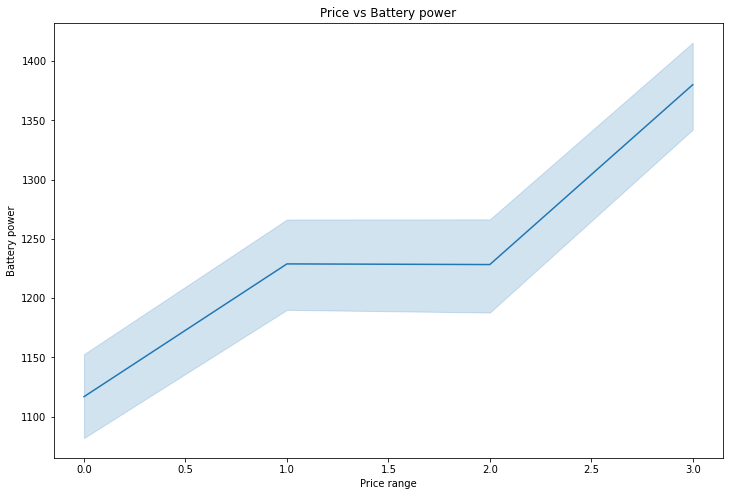

In [21]:
# line plot of traget variable (price) vs Battery power
plt.figure(figsize=(12,8))
sns.lineplot("price_range","battery_power",data=df_mobile)
plt.xlabel("Price range")
plt.ylabel("Battery power")
plt.title("Price vs Battery power")

As see in line plot that  as Battery power increases correspondly price range is also increses. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price vs Ram')

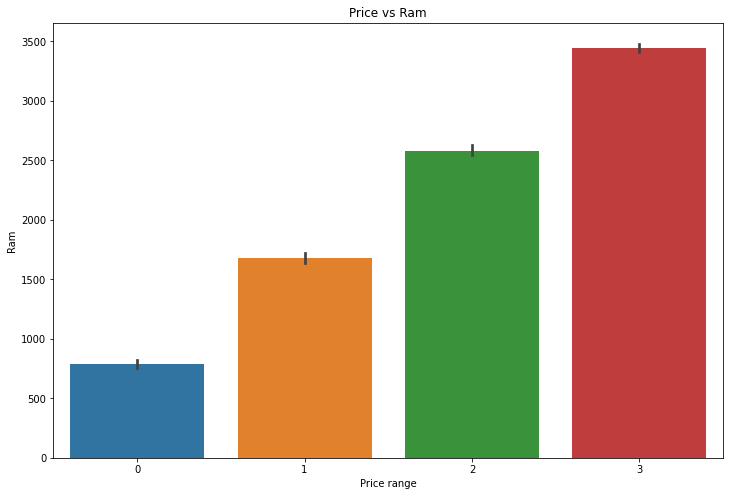

In [22]:
# bar plot of traget variable price vs ram 
plt.figure(figsize=(12,8))
sns.barplot("price_range","ram",data=df_mobile)
plt.xlabel("Price range")
plt.ylabel("Ram")
plt.title("Price vs Ram")

As see in bar graph Increase in Ram size also Increase in Price, this is because cost of RAM is incease ass size of RAM is increase so price of Moble is also increase.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price vs Touch screen')

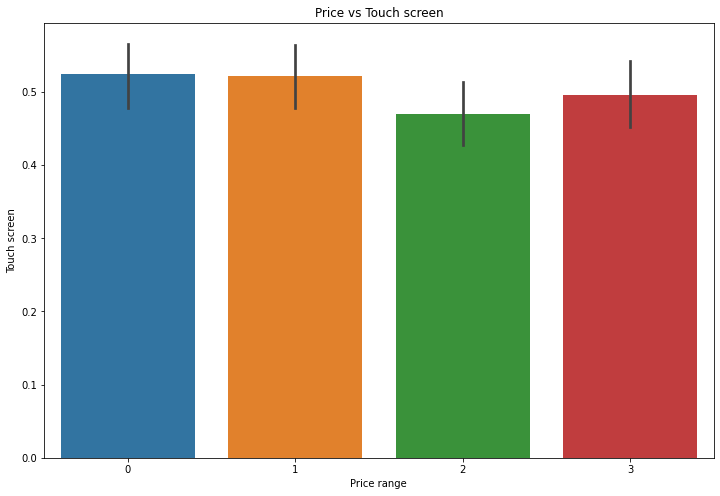

In [23]:
# bar plot of target variable price vs Toch screen
plt.figure(figsize=(12,8))
sns.barplot("price_range","touch_screen",data=df_mobile)
plt.xlabel("Price range")
plt.ylabel("Touch screen")
plt.title("Price vs Touch screen")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Price vs Number of cores')

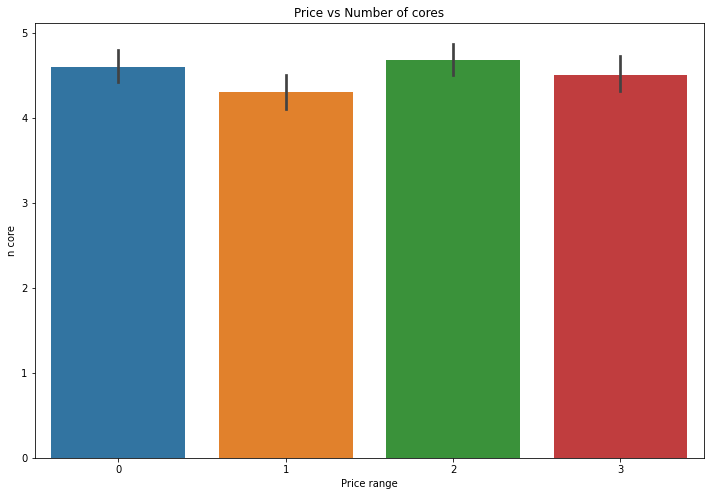

In [24]:
# bar plot of target variable price vs N core
plt.figure(figsize=(12,8))
sns.barplot("price_range","n_cores",data=df_mobile)
plt.xlabel("Price range")
plt.ylabel("n core")
plt.title("Price vs Number of cores")

As see in graph there is no significant change in price with number of cores

([<matplotlib.patches.Wedge at 0x7ff678e9f650>,
 [Text(-1.0998642959886566, -0.01727803256672628, 'Bluthoot support'),
  Text(1.0998642959886566, 0.017278032566726147, 'Bluthoot Not Support')],
 [Text(-0.5999259796301762, -0.009424381400032515, '50.5%'),
  Text(0.5999259796301762, 0.009424381400032442, '49.5%')])

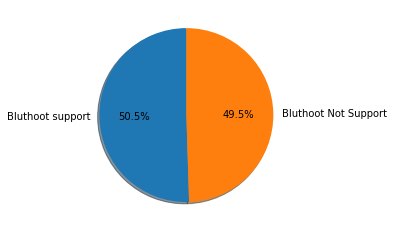

In [25]:
# pie chart of is that mobile has bluthoot support or not
data=df_mobile["blue"].value_counts().values
labels=["Bluthoot support","Bluthoot Not Support"]
plt.pie(data,labels=labels,autopct="%.01f%%",shadow=True,startangle=90)

Almost same ratio of 50%, mobile having bluthoot and not having bluthoot

([<matplotlib.patches.Wedge at 0x7ff678e7ad50>,
 [Text(-1.097491732278043, -0.07424215501546373, '4G - support'),
  Text(1.0974917322780433, 0.07424215501546359, '4G - Not Support')],
 [Text(-0.5986318539698416, -0.04049572091752567, '52.1%'),
  Text(0.5986318539698418, 0.040495720917525596, '47.9%')])

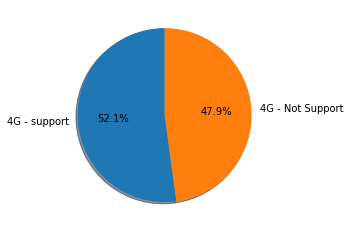

In [26]:
# mobile is 4g support or not 
data=df_mobile["four_g"].value_counts().values
labels=["4G - support","4G - Not Support"]
plt.pie(data,labels=labels,autopct="%.01f%%",shadow=True,startangle=90)

From pie chart 52.1% of mobile phones are 4G - Supported and 47.9% of mobile are not 4G - Supported.

([<matplotlib.patches.Wedge at 0x7ff678dd2e50>,
 [Text(-0.749214765200941, -0.8054050133969238, '3G - support'),
  Text(0.7492147652009411, 0.8054050133969237, '3G - Not Support')],
 [Text(-0.40866259920051323, -0.43931182548923114, '76.2%'),
  Text(0.4086625992005133, 0.4393118254892311, '23.8%')])

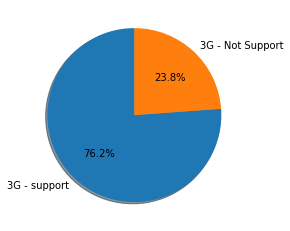

In [27]:
# Mobile is 3G support or not
data=df_mobile["three_g"].value_counts().values
labels=["3G - support","3G - Not Support"]
plt.pie(data,labels=labels,autopct="%.01f%%",shadow=True,startangle=90)

From pie chart 76.2% of mobile phones are 3G - Supported and 23.8% of mobile are not 3G - Supported.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of 3G Mobile')

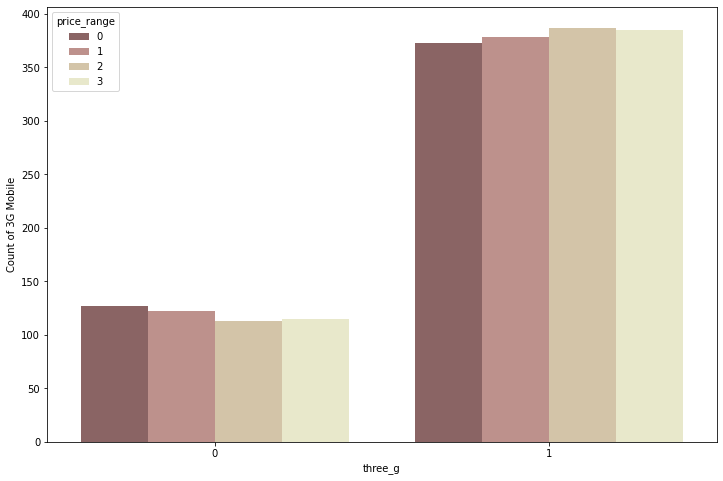

In [28]:
# count plot of 3G supported by using hue of price range
plt.figure(figsize=(12,8))
sns.countplot("three_g",hue="price_range",palette="pink",data=df_mobile)
plt.xlabel("three_g")
plt.ylabel("Count of 3G Mobile")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of 4G Mobile')

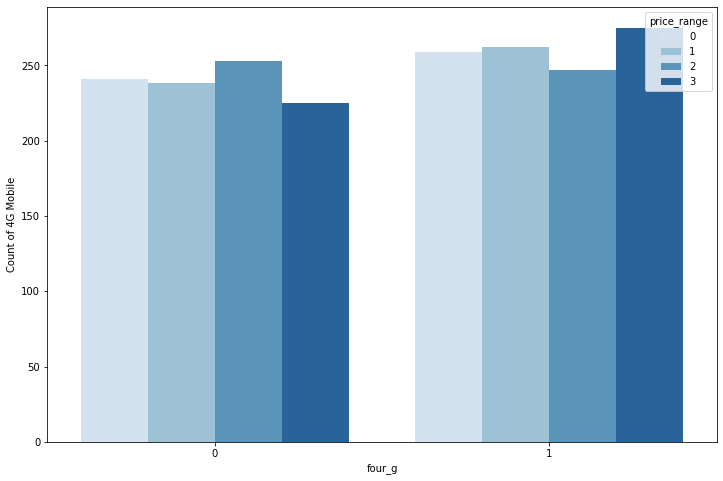

In [29]:
# count plot of 4G supported by using hue of price range
plt.figure(figsize=(12,8))
sns.countplot("four_g",hue="price_range",palette="Blues",data=df_mobile)
plt.xlabel("four_g")
plt.ylabel("Count of 4G Mobile")

In [30]:
df_mobile.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'price range')

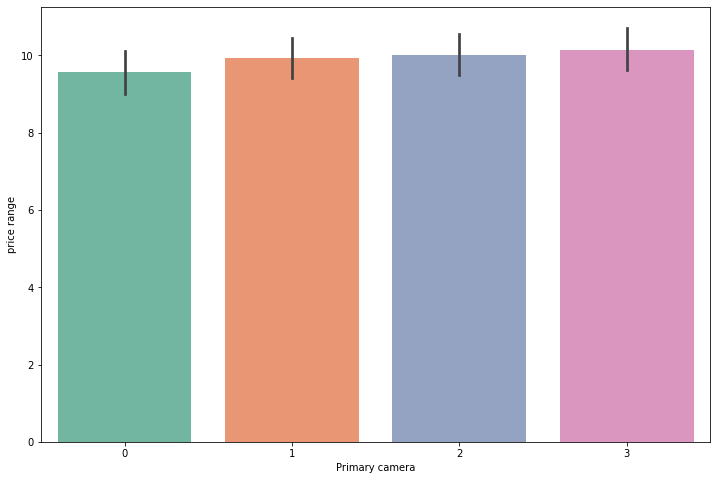

In [31]:
# bar graph of target variable price vs primary camera
plt.figure(figsize=(12,8))
sns.barplot("price_range","pc",palette="Set2",data=df_mobile)
plt.xlabel("Primary camera")
plt.ylabel("price range")

As see in graph in all the price range has primary camera in it and it is almost more than 8 mega pixal.

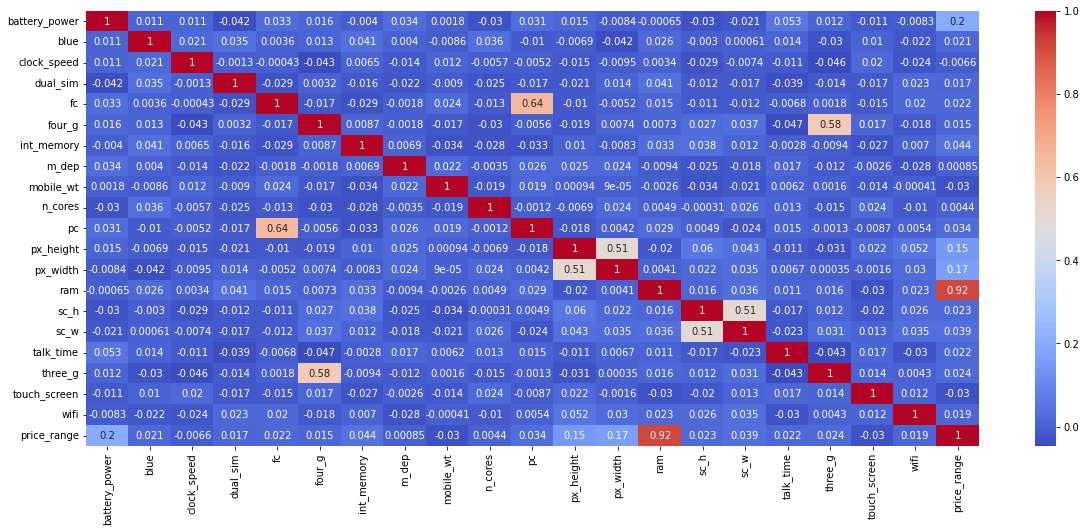

In [32]:
# correlation of dataset features

plt.figure(figsize=(20,8))
correlation= df_mobile.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm")

### **From correlation heatmap:**

Ram is positive and highly correlated with traget variable price it is the most important feature.

Battery power is also has posive acorrelation with price range ir is the second most important feature for price range.

three_g is positive and high correlated with four_g variable.

Pc(Primary camera) positive and has high correlation with fc(Front camera).

px_width and px_hight ha shigh correlation.it is also has positive correlation with target variable price range.


# Split the Data

In [33]:
# Independent Feature 
x = df_mobile.drop("price_range",axis=1)

In [34]:
# target variable
y = df_mobile["price_range"]

In [35]:
# split the data in train and test 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify= y)

In [36]:
print(x_train.shape)
print(x_test.shape)

(1400, 20)
(600, 20)


In [37]:
print(y_train.shape)
print(y_test.shape)

(1400,)
(600,)


## **Fitting models**

In [38]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,10)
train_accuracy= np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

for i,m in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors= m)

  # fit model 
  knn.fit(x_train, y_train)

  # accuracy of training set
  train_accuracy[i] = knn.score(x_train,y_train)

  # accuracy of testing set
  test_accuracy[i] = knn.score(x_test,y_test)


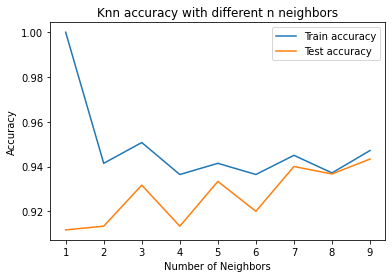

In [39]:
plt.plot(neighbors , train_accuracy , label = "Train accuracy")
plt.plot(neighbors , test_accuracy , label = "Test accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Knn accuracy with different n neighbors")
plt.legend()


In [40]:
# setup knn classifier with k neighbour
knn = KNeighborsClassifier(n_neighbors= 8)

In [41]:
# fit the model
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=8)

In [42]:
# matrics
knn_train_score = knn.score(x_train , y_train) 
knn_train_score 

0.9371428571428572

In [43]:
knn_test_score = knn.score(x_test , y_test) 
knn_test_score 

0.9366666666666666

In [44]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)

In [45]:
# import confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix , roc_auc_score

In [46]:
matrix = confusion_matrix(y_test , y_test_pred)
matrix

array([[148,   2,   0,   0],
       [  8, 139,   3,   0],
       [  0,   7, 137,   6],
       [  0,   0,  12, 138]])

Text(0.5, 1.0, 'Confusion Matrix')

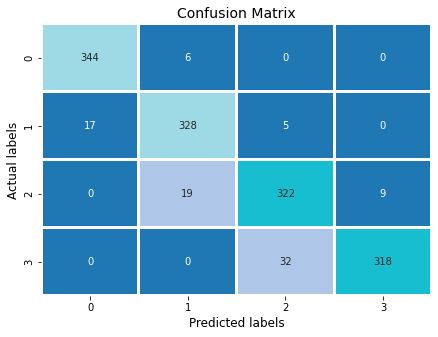

In [47]:
# plot confusion matrix for train
 
train_cm = confusion_matrix(y_train , y_train_pred)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = train_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

Text(0.5, 1.0, 'Confusion Matrix')

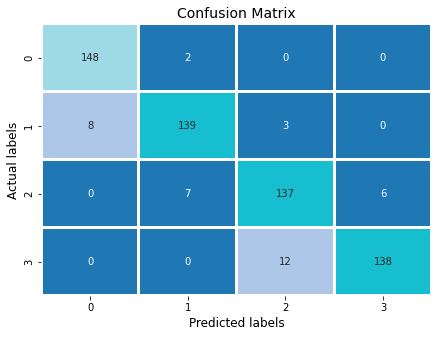

In [48]:
# plot confusion matrix for test
 
test_cm = confusion_matrix(y_test , y_test_pred)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = test_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

In [49]:
y_pred_proba = knn.predict_proba(x_test)

In [50]:
roc_auc_score(y_test , y_pred_proba,multi_class= "ovo",average="weighted")

0.9956722222222222

In [51]:
# predict classification report for training dataset
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       350
           1       0.93      0.94      0.93       350
           2       0.90      0.92      0.91       350
           3       0.97      0.91      0.94       350

    accuracy                           0.94      1400
   macro avg       0.94      0.94      0.94      1400
weighted avg       0.94      0.94      0.94      1400



In [52]:
# predict classification report for test dataset
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       150
           1       0.94      0.93      0.93       150
           2       0.90      0.91      0.91       150
           3       0.96      0.92      0.94       150

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [53]:
y_test

570     3
414     3
1837    1
1510    1
1130    3
       ..
544     1
1303    3
1193    0
1818    0
67      3
Name: price_range, Length: 600, dtype: int64

In [54]:
y_test_pred

array([3, 3, 1, 1, 3, 3, 0, 0, 2, 3, 1, 1, 0, 1, 0, 2, 3, 1, 3, 2, 3, 2,
       2, 0, 3, 2, 1, 3, 2, 3, 2, 3, 0, 1, 1, 1, 2, 2, 1, 2, 3, 1, 2, 3,
       0, 1, 2, 3, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 3, 3, 1, 1, 3, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 2, 1, 0, 2, 1, 2, 1, 3, 0, 2, 0, 2,
       3, 2, 1, 2, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 1, 1, 1, 3, 1, 2, 3, 2,
       1, 1, 0, 2, 1, 3, 1, 0, 3, 1, 2, 1, 0, 0, 2, 1, 1, 3, 0, 0, 3, 2,
       0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 3, 3, 0, 3, 2, 0, 3, 1, 2, 3,
       1, 1, 0, 3, 1, 2, 3, 1, 0, 3, 0, 0, 3, 1, 0, 2, 3, 2, 0, 1, 2, 2,
       0, 1, 1, 1, 3, 1, 1, 3, 2, 2, 0, 3, 3, 1, 0, 2, 2, 0, 3, 2, 0, 1,
       3, 3, 0, 1, 1, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 1, 1, 2, 1, 2, 2,
       3, 0, 2, 2, 2, 1, 2, 3, 0, 2, 1, 0, 2, 3, 3, 1, 3, 0, 1, 3, 1, 2,
       0, 1, 3, 0, 1, 3, 3, 0, 3, 0, 2, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2, 0,
       3, 2, 2, 2, 1, 2, 1, 2, 3, 1, 0, 3, 0, 3, 1, 1, 3, 2, 1, 3, 3, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2,

## **Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logistic_model = LogisticRegression(max_iter=10000)

In [57]:
# fit the model
logistic_model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=10000)

In [58]:
# predict the model 
y_train_pred_logistic = logistic_model.predict(x_train)
y_test_pred_logistic = logistic_model.predict(x_test)

In [59]:
# get accuracy score

train_accuracy = accuracy_score(y_train , y_train_pred_logistic)
test_accuracy = accuracy_score(y_test , y_test_pred_logistic)

In [60]:
print("Accuracy on train data : ",train_accuracy)
print("Accuracy on test data : ",test_accuracy)

Accuracy on train data :  0.8064285714285714
Accuracy on test data :  0.725


Text(0.5, 1.0, 'Confusion Matrix')

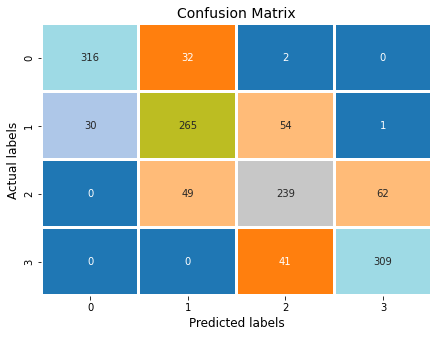

In [61]:
# confusion matrix of train data

train_cm = confusion_matrix(y_train , y_train_pred_logistic)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = train_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)


Text(0.5, 1.0, 'Confusion Matrix')

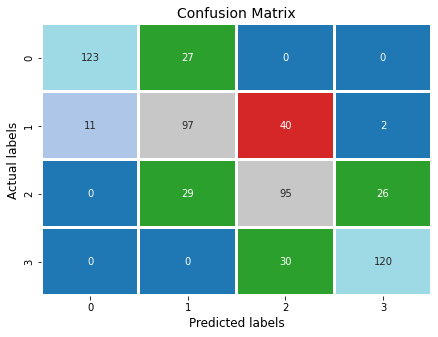

In [62]:
# confusion matrix of train data

train_cm = confusion_matrix(y_test , y_test_pred_logistic)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = train_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

In [63]:
# predict probability
y_pred_proba = logistic_model.predict_proba(x_test)

In [64]:
roc_auc_score(y_test , y_pred_proba,multi_class= "ovo",average="weighted")

0.9294740740740742

In [65]:
# predict classification report for training dataset
print(classification_report(y_train, y_train_pred_logistic))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       350
           1       0.77      0.76      0.76       350
           2       0.71      0.68      0.70       350
           3       0.83      0.88      0.86       350

    accuracy                           0.81      1400
   macro avg       0.81      0.81      0.81      1400
weighted avg       0.81      0.81      0.81      1400



In [66]:
# predict classification report for test dataset
print(classification_report(y_test, y_test_pred_logistic))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       150
           1       0.63      0.65      0.64       150
           2       0.58      0.63      0.60       150
           3       0.81      0.80      0.81       150

    accuracy                           0.73       600
   macro avg       0.73      0.72      0.73       600
weighted avg       0.73      0.72      0.73       600



## **GradientBoostingClassifier**

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
# list of learning rate
learning_rate_list = [0.05, 0.07, 0.08, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in learning_rate_list:
  gb_clsf = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_depth = 2,  random_state = 0) 
  gb_clsf.fit(x_train, y_train)

  print("learning rate :",learning_rate)
  print("Accuracy score of train data : {0:.3f}".format(gb_clsf.score(x_train, y_train)))
  print("Accuracy score of test data : {0:.3f} ".format(gb_clsf.score(x_test, y_test)))
    

learning rate : 0.05
Accuracy score of train data : 0.783
Accuracy score of test data : 0.753 
learning rate : 0.07
Accuracy score of train data : 0.804
Accuracy score of test data : 0.772 
learning rate : 0.08
Accuracy score of train data : 0.804
Accuracy score of test data : 0.772 
learning rate : 0.1
Accuracy score of train data : 0.816
Accuracy score of test data : 0.780 
learning rate : 0.25
Accuracy score of train data : 0.907
Accuracy score of test data : 0.853 
learning rate : 0.5
Accuracy score of train data : 0.967
Accuracy score of test data : 0.902 
learning rate : 0.75
Accuracy score of train data : 0.988
Accuracy score of test data : 0.912 
learning rate : 1
Accuracy score of train data : 0.996
Accuracy score of test data : 0.893 


From above we can say that learning rate 0.75 is gives the best result on train data as well as in test data also.

In [69]:
# new classifier with the learning rate of 0.75

gb_clsf1 = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_depth = 2,  random_state = 0) 
gb_clsf1.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.75, max_depth=2, n_estimators=20,
                           random_state=0)

In [70]:
# predict 
gb_clsf1_train_pred = gb_clsf1.predict(x_train)
gb_clsf1_train_pred

gb_clsf1_test_pred = gb_clsf1.predict(x_test)
gb_clsf1_test_pred

array([3, 3, 1, 1, 3, 3, 0, 0, 2, 3, 1, 1, 0, 1, 0, 1, 3, 2, 3, 2, 3, 2,
       2, 0, 3, 2, 1, 3, 2, 3, 2, 3, 0, 1, 2, 2, 2, 1, 1, 2, 3, 1, 2, 3,
       0, 2, 2, 3, 2, 2, 1, 0, 0, 3, 0, 2, 0, 2, 2, 3, 3, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 0, 2, 1, 2, 1, 3, 0, 2, 0, 2,
       3, 3, 1, 2, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 1, 1, 1, 3, 1, 3, 3, 2,
       1, 1, 0, 2, 1, 3, 1, 0, 3, 1, 2, 1, 1, 0, 1, 1, 1, 3, 0, 0, 3, 2,
       0, 0, 0, 0, 1, 2, 1, 2, 3, 0, 2, 0, 3, 3, 0, 3, 2, 0, 3, 1, 2, 3,
       2, 1, 0, 3, 1, 2, 3, 1, 0, 3, 0, 0, 3, 1, 1, 2, 3, 2, 0, 1, 1, 2,
       0, 1, 1, 1, 3, 1, 1, 3, 2, 2, 0, 3, 3, 1, 0, 2, 2, 0, 3, 2, 0, 1,
       3, 3, 0, 2, 1, 3, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 1, 1, 3, 1, 2, 2,
       3, 0, 2, 2, 2, 1, 2, 3, 0, 2, 1, 0, 2, 2, 3, 1, 3, 0, 2, 3, 1, 2,
       0, 1, 3, 0, 1, 2, 3, 0, 3, 0, 2, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2, 0,
       3, 2, 2, 2, 2, 3, 1, 2, 3, 1, 0, 3, 0, 2, 1, 2, 3, 2, 1, 3, 3, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2,

In [71]:
print("Classification report",classification_report(y_test , gb_clsf1_test_pred))

Classification report               precision    recall  f1-score   support

           0       0.97      0.98      0.98       150
           1       0.90      0.85      0.88       150
           2       0.82      0.88      0.85       150
           3       0.95      0.93      0.94       150

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



Text(0.5, 1.0, 'Confusion Matrix')

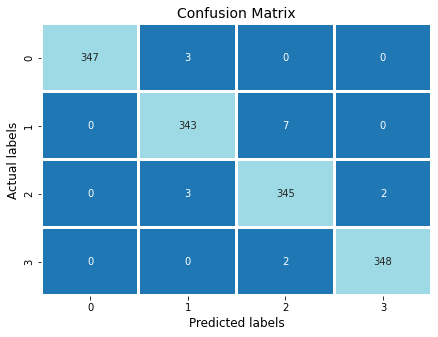

In [72]:
# confusion matrix of train data

train_cm = confusion_matrix(y_train , gb_clsf1_train_pred)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = train_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

Text(0.5, 1.0, 'Confusion Matrix')

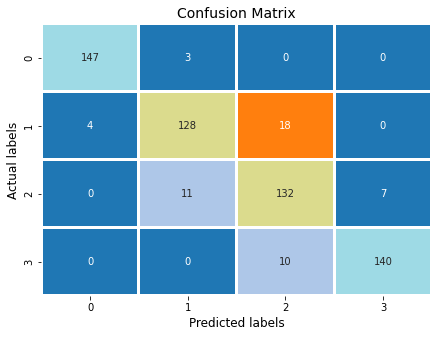

In [73]:
# confusion matrix of train data

test_cm = confusion_matrix(y_test , gb_clsf1_test_pred)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = test_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

## **XGBclassifier**

In [74]:
from xgboost import XGBClassifier

In [75]:
xgb_clsf = XGBClassifier()

In [76]:
# fit the model
xgb_clsf.fit(x_train , y_train)

XGBClassifier(objective='multi:softprob')

In [77]:
# predict
xgb_train_pred = xgb_clsf.predict(x_train)
xgb_test_pred = xgb_clsf.predict(x_test)


In [78]:
print("Classification report",classification_report(y_test , xgb_test_pred))

Classification report               precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.89      0.90      0.89       150
           2       0.85      0.84      0.85       150
           3       0.93      0.92      0.92       150

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



Text(0.5, 1.0, 'Confusion Matrix')

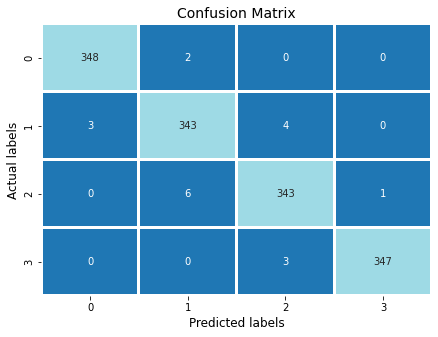

In [79]:
# confusion matrix of train data

train_cm = confusion_matrix(y_train , xgb_train_pred)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = train_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

Text(0.5, 1.0, 'Confusion Matrix')

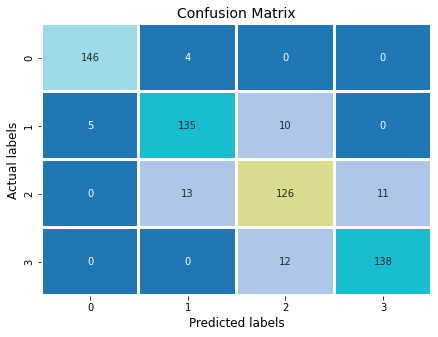

In [80]:
# confusion matrix of test data

test_cm = confusion_matrix(y_test , xgb_test_pred)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = test_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

## **Random Forest Classification**

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# parameters for random forest

# number of estimators
n_estimators = [50,80,100,125]

# maximun depth of tree
max_depth = [3,4,5,7,8]


parameter = {
    "n_estimators" : n_estimators,
    "max_depth" : max_depth,
   
}

rf_clsf = RandomForestClassifier()

In [83]:
# gridsearchCV 

rf_grid = GridSearchCV(estimator = rf_clsf, param_grid=parameter, cv = 5, verbose= 2, n_jobs = -1, scoring = "accuracy")

# fit the data
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 7, 8],
                         'n_estimators': [50, 80, 100, 125]},
             scoring='accuracy', verbose=2)

In [84]:
rf_optimal = rf_grid.best_estimator_

In [85]:
rf_grid.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [86]:
# prediction on train and test data
y_train_pred_rf = rf_optimal.predict(x_train)
y_test_pred_rf = rf_optimal.predict(x_test)

In [87]:
# probability on train and test data
y_train_proba = rf_optimal.predict_proba(x_train)
y_test_proba = rf_optimal.predict_proba(x_test)

In [88]:
# accuracy score
rf_train_accuracy = accuracy_score(y_train , y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test , y_test_pred_rf)

In [89]:
  print("Accuracy score of train data : ",rf_train_accuracy)
  print("Accuracy score of test data : " ,rf_test_accuracy)

Accuracy score of train data :  0.9678571428571429
Accuracy score of test data :  0.8516666666666667


Text(0.5, 1.0, 'Confusion Matrix')

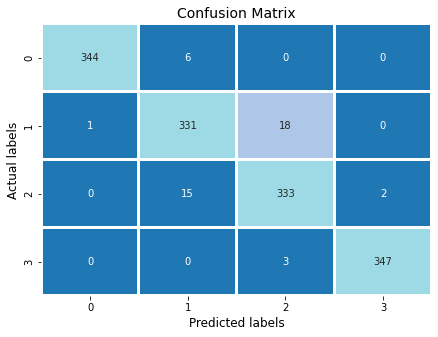

In [90]:
# confusion matrix of train data

train_cm = confusion_matrix(y_train , y_train_pred_rf)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = train_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

Text(0.5, 1.0, 'Confusion Matrix')

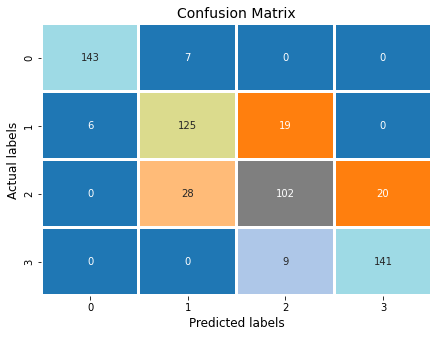

In [91]:
# confusion matrix of test data

test_cm = confusion_matrix(y_test , y_test_pred_rf)

df1 = pd.DataFrame(columns = ["0", "1", "2", "3" ], index= ["0", "1", "2", "3"],data = test_cm)

plt.figure(figsize=(7,5))
sns.heatmap(df1, annot = True, fmt = ".0f",cmap="tab20", cbar = False, linewidths=2)
plt.xlabel("Predicted labels", size=12)
plt.ylabel("Actual labels", size=12)
plt.title("Confusion Matrix",size=14)

In [92]:
print("Classification report",classification_report(y_train , y_train_pred_rf))

Classification report               precision    recall  f1-score   support

           0       1.00      0.98      0.99       350
           1       0.94      0.95      0.94       350
           2       0.94      0.95      0.95       350
           3       0.99      0.99      0.99       350

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



In [93]:
print("Classification report",classification_report(y_test , y_test_pred_rf))

Classification report               precision    recall  f1-score   support

           0       0.96      0.95      0.96       150
           1       0.78      0.83      0.81       150
           2       0.78      0.68      0.73       150
           3       0.88      0.94      0.91       150

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600

